# **Probability Project : "An In-Depth Analysis Of McDonald's Food Menu"**



## **Introduction**
This project aims to analyse the menu items of MacDonald's US outlets. We wish to find and understand the nutritious facts present in the fast food we chearish so dearly and check how it might affect our health. 
<br>


## **Importing Libraries,Dataset and performing Basic Setup**

Importing Libraries --->



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

Mounting a Google Drive to obtain the CSV file --->

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preparation And Cleaning (deleting missing values and unimportant columns)**


Converting csv to a Pandas DataFrame --->





In [ ]:
df=pd.read_csv("menu.csv") 

We will now check if any of our data has null elements or not --->

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
print(df.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


In [ ]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Since the data has non-null elements we will view it once to see what all can be analysed and work on analysis --->

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.shape

(260, 24)

In [ ]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
df2=df[["Category","Item","Calories","Total Fat (% Daily Value)","Saturated Fat (% Daily Value)","Cholesterol (% Daily Value)","Sodium (% Daily Value)","Carbohydrates (% Daily Value)","Dietary Fiber (% Daily Value)","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)","Calcium (% Daily Value)","Iron (% Daily Value)","Protein","Sugars","Trans Fat"]]

In [ ]:
df2.rename(columns = {"Total Fat (% Daily Value)":"Total Fat","Saturated Fat (% Daily Value)":"Saturated Fat","Cholesterol (% Daily Value)":"Cholesterol","Sodium (% Daily Value)":"Sodium","Carbohydrates (% Daily Value)":"Carbohydrates","Dietary Fiber (% Daily Value)":"Dietary Fiber","Vitamin A (% Daily Value)":"Vitamin A","Vitamin C (% Daily Value)":"Vitamin C","Calcium (% Daily Value)":"Calcium","Iron (% Daily Value)":"Iron"},inplace=True)

In [ ]:
df2.iloc[57:61]

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,510,33,18,16,41,18,13,4,6,15,20,24,10,0.0
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,13,9,22,34,14,13,4,8,15,20,28,8,0.0
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,670,51,44,29,59,19,14,8,20,30,20,36,11,0.0
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,510,31,36,35,52,15,13,8,20,30,20,40,9,0.0


In [ ]:
df2["Category"] = df2["Category"].str.replace("Smoothies & Shakes","Smoothies")

In [ ]:
df2.head(5)

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat
0,Breakfast,Egg McMuffin,300,20,25,87,31,10,17,10,0,25,15,17,3,0.0
1,Breakfast,Egg White Delight,250,12,15,8,32,10,17,6,0,25,8,18,3,0.0
2,Breakfast,Sausage McMuffin,370,35,42,15,33,10,17,8,0,25,10,14,2,0.0
3,Breakfast,Sausage McMuffin with Egg,450,43,52,95,36,10,17,15,0,30,15,21,2,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,42,16,37,10,17,6,0,25,10,21,2,0.0


In [ ]:
print(df2.isnull().any())

Category         False
Item             False
Calories         False
Total Fat        False
Saturated Fat    False
Cholesterol      False
Sodium           False
Carbohydrates    False
Dietary Fiber    False
Vitamin A        False
Vitamin C        False
Calcium          False
Iron             False
Protein          False
Sugars           False
Trans Fat        False
dtype: bool


In [ ]:
df2 = df2.sort_values(by="Category")

## **Analysing Data**


In [ ]:
df2.pivot_table('Protein', 'Category')

,Protein
Category,
Beef & Pork,27.333333
Beverages,1.333333
Breakfast,19.857143
Chicken & Fish,29.111111
Coffee & Tea,8.863158
Desserts,4.000000
Salads,19.833333
Smoothies,10.857143
Snacks & Sides,8.384615


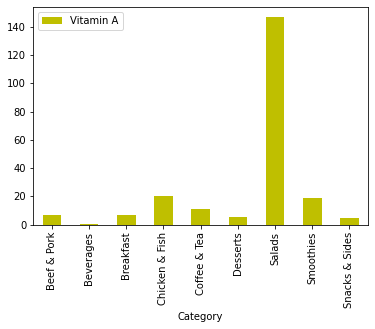

In [ ]:
df2.pivot_table('Vitamin A', 'Category').plot(kind='bar', stacked=True, color = 'y')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

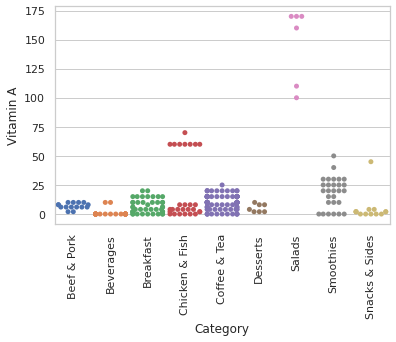

In [ ]:
sns.set(style="whitegrid", color_codes=True)
ax= sns.swarmplot(x="Category", y="Vitamin A", data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

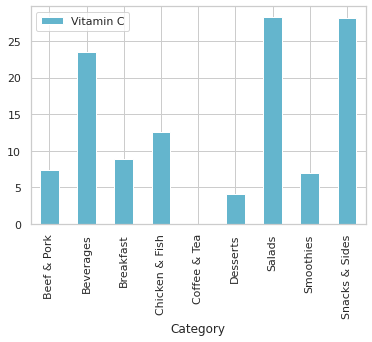

In [ ]:
df2.pivot_table('Vitamin C', 'Category').plot(kind='bar', stacked=True, color = 'c')

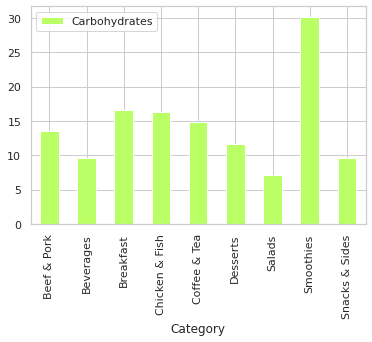

In [ ]:
df2.pivot_table('Carbohydrates', 'Category').plot(kind='bar', stacked=True, color = '#BBFF66')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

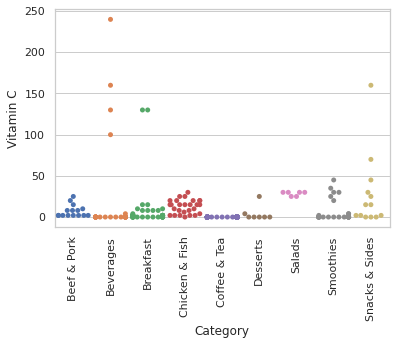

In [ ]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Vitamin C", data=df2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

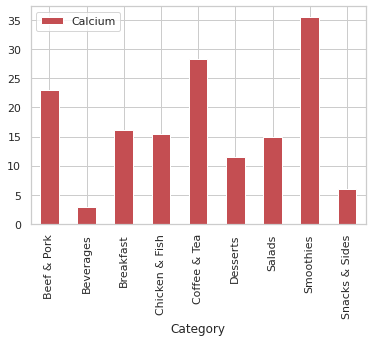

In [ ]:
df2.pivot_table('Calcium', 'Category').plot(kind='bar', stacked=True, color = 'r')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

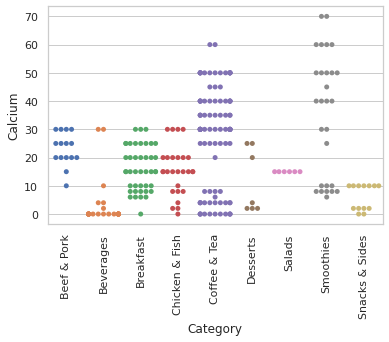

In [ ]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Calcium", data=df2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

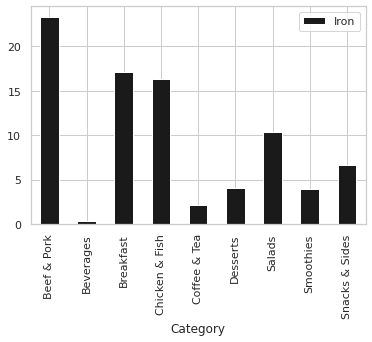

In [ ]:
df2.pivot_table('Iron', 'Category').plot(kind='bar',color = 'k')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

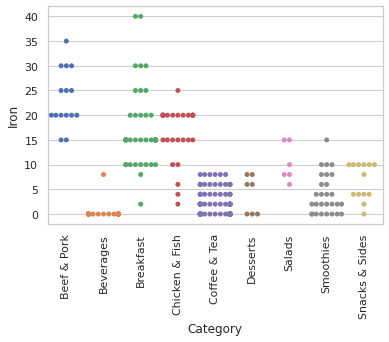

In [ ]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Iron", data=df2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

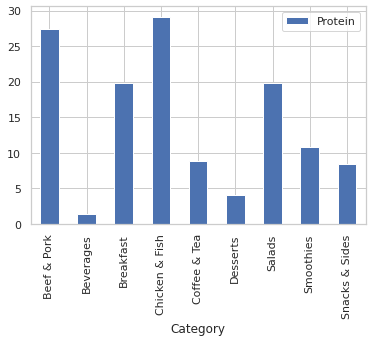

In [ ]:
df2.pivot_table('Protein', 'Category').plot(kind='bar', stacked=True, color = 'b')

[Text(0, 0, 'Beef & Pork'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Chicken & Fish'),
 Text(0, 0, 'Coffee & Tea'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Salads'),
 Text(0, 0, 'Smoothies'),
 Text(0, 0, 'Snacks & Sides')]

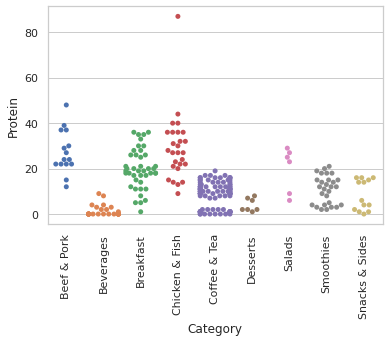

In [ ]:
sns.set(style="whitegrid", color_codes=True)
ax1= sns.swarmplot(x="Category", y="Protein", data=df2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

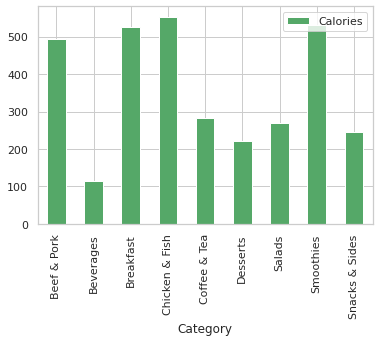

In [ ]:
df2.pivot_table( 'Calories', 'Category').plot( kind='bar', stacked=True, color = "g")

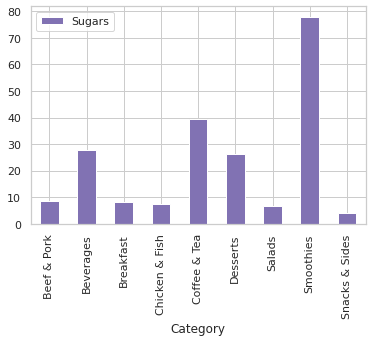

In [ ]:
df2.pivot_table( 'Sugars', 'Category').plot( kind='bar', stacked=True, color = "m")

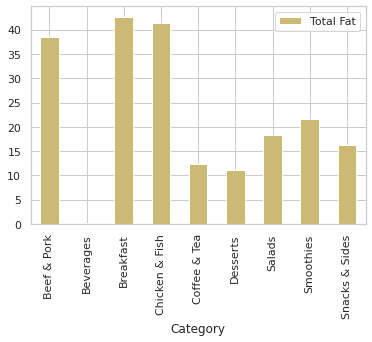

In [ ]:
df2.pivot_table( 'Total Fat', 'Category').plot( kind='bar', stacked=True, color = "y")

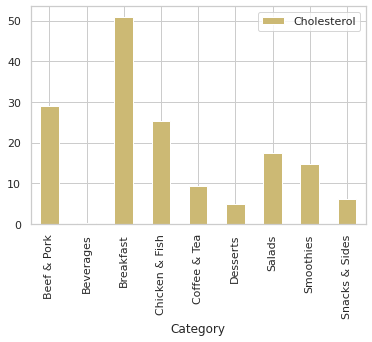

In [ ]:
df2.pivot_table( 'Cholesterol', 'Category').plot( kind='bar', stacked=True, color = "y")

Coffee & Tea      95
Breakfast         42
Smoothies         28
Chicken & Fish    27
Beverages         27
Beef & Pork       15
Snacks & Sides    13
Desserts           7
Salads             6
Name: Category, dtype: int64

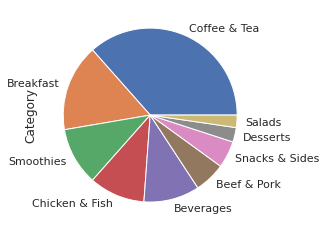

In [ ]:
df2.Category.value_counts().plot.pie()
df2.Category.value_counts()

In [ ]:
df2['isGrilled']=df2.Item.str.contains("Grilled")
df2['isCrispy']= df2.Item.str.contains("Crispy")

In [ ]:
df2[df2["isCrispy"] == True]

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,670,51,44,29,59,19,14,8,20,30,20,36,11,0.0,False,True
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,510,33,18,16,41,18,13,4,6,15,20,24,10,0.0,False,True
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,610,43,31,24,58,19,13,4,20,15,20,32,11,0.0,False,True
70,Chicken & Fish,Premium McWrap Chicken & Bacon (Crispy Chicken),630,49,45,26,64,19,13,60,20,20,20,32,7,0.5,False,True
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,750,59,51,31,72,22,15,8,25,30,15,36,16,0.5,False,True
72,Chicken & Fish,Premium McWrap Chicken & Ranch (Crispy Chicken),610,47,40,21,56,19,14,60,15,20,20,27,8,0.5,False,True
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),670,51,40,21,62,23,19,60,15,20,20,27,12,0.5,False,True
76,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Crispy Chi...,540,35,23,16,52,20,13,60,15,8,20,23,14,0.0,False,True
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,430,29,15,14,38,14,7,4,2,15,15,21,7,0.0,False,True
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,380,33,29,23,36,7,10,100,25,15,8,25,5,0.0,False,True


In [ ]:
grilled_df = df2[df2['isGrilled'] == True]
crispy_df = df2[df2['isCrispy'] == True]
grilled_df=grilled_df[['Item','Total Fat','Calories']]
crispy_df=crispy_df[['Item','Total Fat','Calories']]

In [ ]:
df1=grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True,right_index=True)

In [ ]:
df1.columns=['Items-Grilled','TotalFat-Grilled','Calories-Grilled','Items-Crispy','TotalFat-Crispy','Calories-Crispy']
df1=df1.drop('Items-Crispy',axis=1)

In [ ]:
df1.shape

(13, 5)

In [ ]:
df1.head()

,Items-Grilled,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy
0,Premium Grilled Chicken Club Sandwich,31,510,51,670
1,Premium McWrap Chicken & Bacon (Grilled Chicken),28,480,33,510
2,Premium Grilled Chicken Classic Sandwich,13,350,43,610
3,Premium McWrap Chicken Sweet Chili (Grilled Ch...,15,380,49,630
4,Premium McWrap Chicken & Ranch (Grilled Chicken),27,450,59,750


In [ ]:
df1['Item']=df1['Items-Grilled'].str.replace("Grilled","")

In [ ]:
df1=df1.drop('Items-Grilled',axis=1)

In [ ]:
df1.head()

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy,Item
0,31,510,51,670,Premium Chicken Club Sandwich
1,28,480,33,510,Premium McWrap Chicken & Bacon ( Chicken)
2,13,350,43,610,Premium Chicken Classic Sandwich
3,15,380,49,630,Premium McWrap Chicken Sweet Chili ( Chicken)
4,27,450,59,750,Premium McWrap Chicken & Ranch ( Chicken)


In [ ]:
df1.index=df1.Item

In [ ]:
df1.head()

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy,Item
Item,,,,,
Premium Chicken Club Sandwich,31,510,51,670,Premium Chicken Club Sandwich
Premium McWrap Chicken & Bacon ( Chicken),28,480,33,510,Premium McWrap Chicken & Bacon ( Chicken)
Premium Chicken Classic Sandwich,13,350,43,610,Premium Chicken Classic Sandwich
Premium McWrap Chicken Sweet Chili ( Chicken),15,380,49,630,Premium McWrap Chicken Sweet Chili ( Chicken)
Premium McWrap Chicken & Ranch ( Chicken),27,450,59,750,Premium McWrap Chicken & Ranch ( Chicken)


In [ ]:
df1.drop(columns="Item",inplace=True)

In [ ]:
df1["TotalFat-Crispy"].replace({43:33},inplace=True)
df1.iloc[[2,0]]

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy
Item,,,,
Premium Chicken Classic Sandwich,13,350,33,610
Premium Chicken Club Sandwich,31,510,51,670


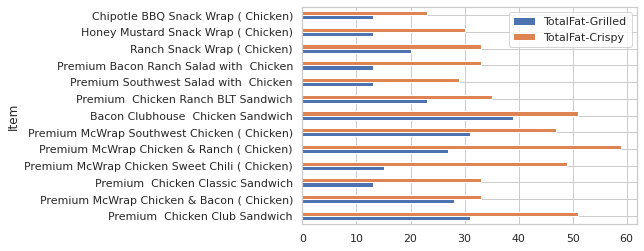

In [ ]:
df1[["TotalFat-Grilled","TotalFat-Crispy"]].plot(kind="barh")

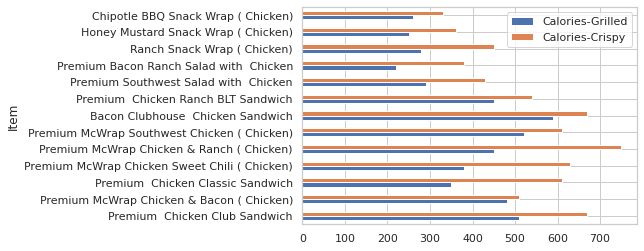

In [ ]:
df1[["Calories-Grilled","Calories-Crispy"]].plot(kind="barh")

In [ ]:
df2["Category"].value_counts()

Coffee & Tea      95
Breakfast         42
Smoothies         28
Chicken & Fish    27
Beverages         27
Beef & Pork       15
Snacks & Sides    13
Desserts           7
Salads             6
Name: Category, dtype: int64

## **Questions, Answers And Interpretations that can be drawn from the Data :**

####Q) What foods would be preferred by a person on a Keto Diet?

A Keto Diet is a high-fat,high protein and low-carb diet to lose weight. Hence the preferred food items would include beef and pork products like Big Mac and the MacD-Hamburger.





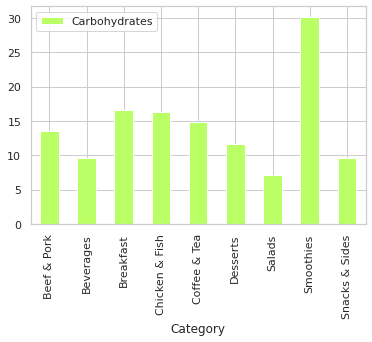

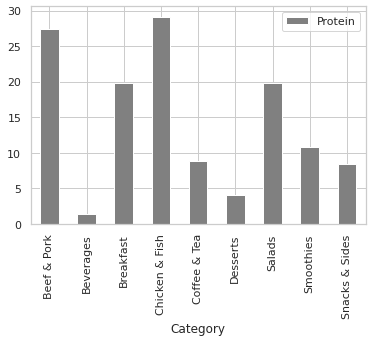

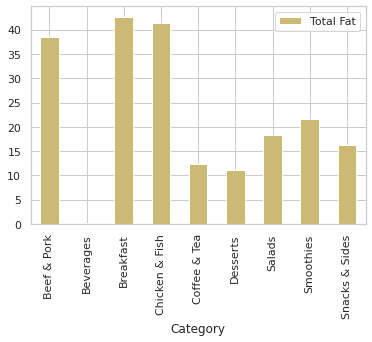

In [ ]:
df2.pivot_table('Carbohydrates', 'Category').plot(kind='bar', stacked=True, color = '#BBFF66')
df2.pivot_table( 'Protein', 'Category').plot( kind='bar', stacked=True, color = "gray")
df2.pivot_table( 'Total Fat', 'Category').plot( kind='bar', stacked=True, color = "y")

#### Q) What food items would diabetic patients avoid? <br>
In general Beverages and Desserts(obviously) as is also shown by the data must be avoided due to their high sugar content:
  Beverages, Coffee & Tea, Desserts and Smoothies




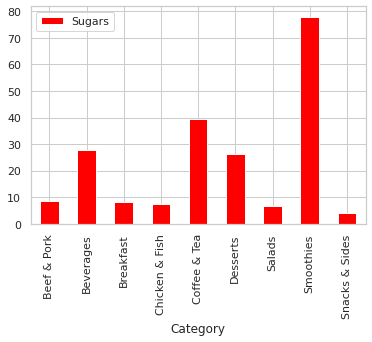

In [ ]:
df2.pivot_table( 'Sugars', 'Category').plot( kind='bar', stacked=True, color = "red")

####Q) How does Grilled food compare to Fried food?<br>
We compare Grilled chicken vs Fried chicken to see the difference. As depicted by the the tables and graphs comparing fried and grilled food,it is evident that grilled food items contains less calories and less fat and are therefore healthier. 

In [ ]:
df1.head()

,TotalFat-Grilled,Calories-Grilled,TotalFat-Crispy,Calories-Crispy
Item,,,,
Premium Chicken Club Sandwich,31,510,51,670
Premium McWrap Chicken & Bacon ( Chicken),28,480,33,510
Premium Chicken Classic Sandwich,13,350,33,610
Premium McWrap Chicken Sweet Chili ( Chicken),15,380,49,630
Premium McWrap Chicken & Ranch ( Chicken),27,450,59,750


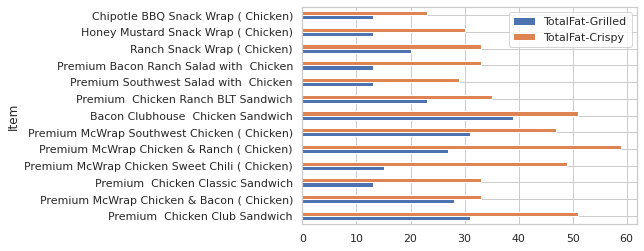

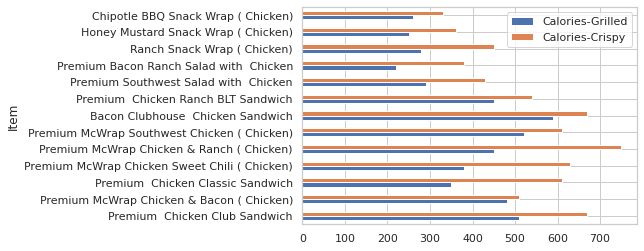

In [ ]:
df1[["TotalFat-Grilled","TotalFat-Crispy"]].plot(kind="barh")
df1[["Calories-Grilled","Calories-Crispy"]].plot(kind="barh")

####Q) Which is the healthiest food out of all the given categories?
Salad because it has nutrients like Vitamins (A & C), Proteins in abundance while calories and sugar content is extremely low. GO GREENS!!!!

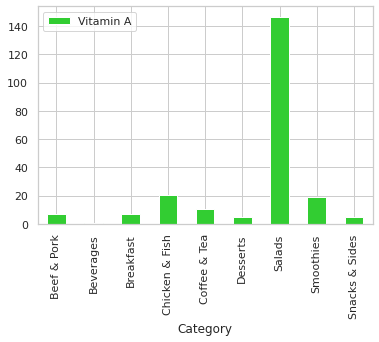

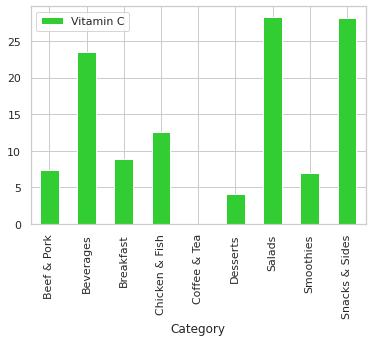

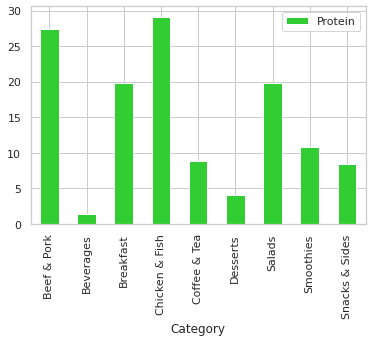

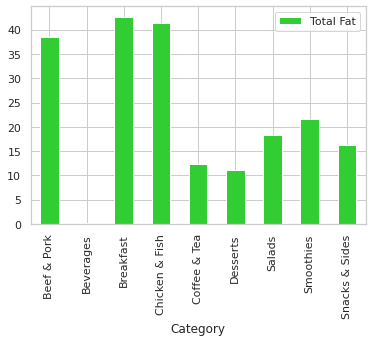

In [ ]:
df2.pivot_table( 'Vitamin A', 'Category').plot( kind='bar', stacked=True, color = "#32CD32")
df2.pivot_table( 'Vitamin C', 'Category').plot( kind='bar', stacked=True, color = "#32CD32")
df2.pivot_table( 'Protein', 'Category').plot( kind='bar', stacked=True, color = "#32CD32")
df2.pivot_table( 'Total Fat', 'Category').plot( kind='bar', stacked=True, color = "#32CD32")

## **Inferences**
Some clear Inferences drawn : <br>


*  Beverages are some of the best sources of Vitamin C from
this menu.
*  Salads are the most healthy and nutritious food from this menu dataset.
*   Dietry Fibre is probably the most common nutrient in all of MacD's menu, which should come as no suprise since most of the menu items have potato viz a rich source of Dietry Fibre.
*   Sugar is also found in abundance in the menu and is almost impossible to get a sugar-free preparation from the standard menu.  
*   Chicken And Fish are an excellent source of Sodium.
* Breakfast Category of food items are very high in Cholestrol content. 
* With the exception of a few, high calorie count is standard in most of the preparations and is again, very difficult to avoid.












## **Summary**
Analysing the menu items has revelead that if chosen correctly, we can get some healthy and tasty food options. Most of the menu can, at large, be divided brodly into nutritious and non-nutritious categories, and that might be of great help to the general consumer. Fitness enthuisiasts can thereafter make informed decisions and not get too carried away on their cheat days. People with dietry restrictions can also use this analysis to choose the best fits for themselves. <br>
Also, in general one should try to avoid fast food as much as possible, because even the most "healthy" food options out here are not so healthy.

## **References** : 


*   https://numpy.org/doc/
*   https://pandas.pydata.org/docs/
*   https://www.geeksforgeeks.org
*  https://www.kaggle.com
*  https://www.kaggle.com/mcdonalds/nutrition-facts
* https://www.medicalnewstoday.com/articles/5847



## **Submitted By:** <br>
### Dhruv Lawaniya - E20CSE021 <br>
### Saumya Tripathi - E20CSE030